Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [ ]:
# shape of dataframe
df.shape

(400, 5)

In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           382 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,34.102500,69742.500000
std,7.165832e+04,15.221901,34096.960282
min,1.556669e+07,0.000000,15000.000000
25%,1.562676e+07,27.000000,43000.000000
50%,1.569434e+07,36.000000,70000.000000
75%,1.575036e+07,45.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [ ]:
# no of unqiue value for each column
df.nunique()

,0
User ID,400
Gender,6
Age,44
EstimatedSalary,117
Purchased,2


In [ ]:
# finding the unique values in the gender column
df['Gender'].unique()

array([nan, 'M', 'F', '@', '#', '%', '$'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].replace(r'[^MF]', pd.NA, regex=True)

In [ ]:
# Counting current distribution (ignores NaN automatically)
gender_counts = df['Gender'].value_counts(normalize=True)  # gives probabilities

# Filling NaNs with 'M' or 'F' according to distribution
def assign_gender(x):
    if pd.isna(x):
        return np.random.choice(gender_counts.index, p=gender_counts.values)
    return x
df['Gender'] = df['Gender'].apply(assign_gender)
print(df)

      User ID Gender  Age  EstimatedSalary Purchased
0    15624510      F   19            19000        No
1    15810944      M   35            20000        No
2    15668575      F   26            43000        No
3    15603246      F   27            57000        No
4    15804002      M   19            76000        No
..        ...    ...  ...              ...       ...
395  15691863      F   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      F   50            20000       Yes
398  15755018      F   36            33000        No
399  15594041      M   49            36000       Yes

[400 rows x 5 columns]


In [ ]:
df['Gender'].value_counts()

,count
Gender,
F,209
M,191


In [ ]:
# Cleaning Age column
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18,  0, 47, 45, 46, 48, 49, 29, 31, 21,
       28, 33, 30, 23, 24, 59, 22, 34, 39, 38, 37, 42, 36, 40, 41, 58, 55,
       52, 60, 56, 53, 50, 51, 57, 43, 54, 44])

In [ ]:
df['Age'].value_counts()

,count
Age,
0,40
35,30
37,18
42,16
26,15
40,14
48,13
39,13
41,13


In [ ]:
df['Age'] = np.where(df['Age'] == 0, df['Age'].median(), df['Age'])
df['Age'].value_counts()
df['Age'] = df['Age'].astype(int)
df['Age'].value_counts()

,count
Age,
36,50
35,30
37,18
42,16
26,15
40,14
47,13
48,13
41,13


In [ ]:
df = df.drop(['User ID'], axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,F,19,19000,No
1,M,35,20000,No
2,F,26,43000,No
3,F,27,57000,No
4,M,19,76000,No


In [ ]:
# encoding the target and gender columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Purchased'] = le.fit_transform(df['Purchased'])
print(df)

     Gender  Age  EstimatedSalary  Purchased
0         0   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       0   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]


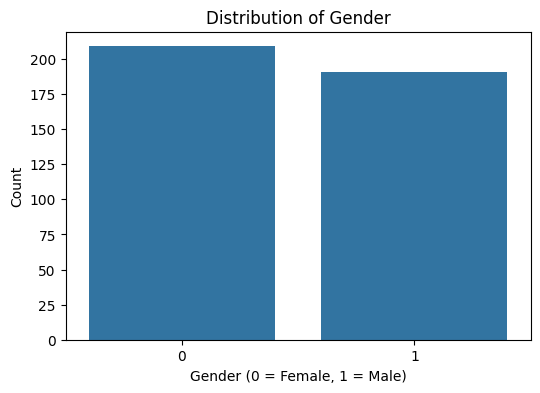

In [ ]:
# Count plot for Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

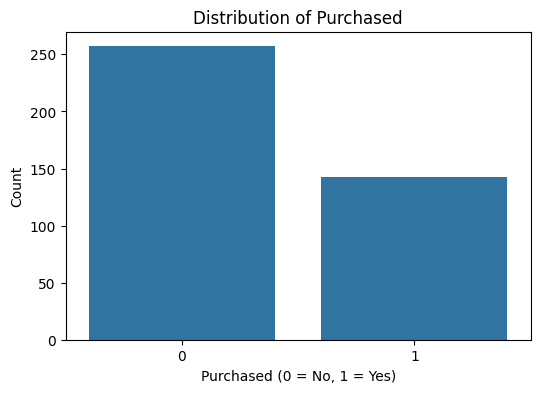

In [ ]:
# Count plot for Purchased
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=df)
plt.title("Distribution of Purchased")
plt.xlabel("Purchased (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
corr_matrix = df.corr()

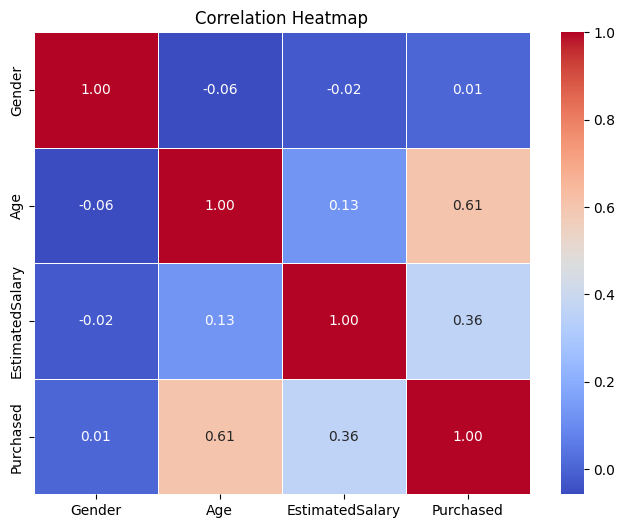

In [ ]:
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# atandardizing age and estimated salary column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])
display(df.head())

,Gender,Age,EstimatedSalary,Purchased
0,0,-1.849748,-1.490046,0
1,1,-0.267288,-1.460681,0
2,0,-1.157422,-0.785290,0
3,0,-1.058518,-0.374182,0
4,1,-1.849748,0.183751,0


In [ ]:
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']

In [ ]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Initializing parameters
def initialize_parameters(n_features):
    w = np.zeros((n_features, 1))
    b = 0
    return w, b

In [ ]:
# Cost function
def compute_cost(y, y_hat):
    m = y.shape[0]
    cost = - (1/m) * np.sum(y * np.log(y_hat + 1e-4) + (1 - y) * np.log(1 - y_hat + 1e-4))
    return cost

In [ ]:
# Gradient Descent
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    costs = []

    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        # Compute cost
        cost = compute_cost(y, y_hat)

        # Backward propagation
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Store cost every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return w, b, costs

In [ ]:
w, b = initialize_parameters(X.shape[1])

# Train
w, b, costs = gradient_descent(X, y.values.reshape(-1, 1), w, b, learning_rate=0.1, num_iterations=1000)

print("Final weights:\n", w)
print("Final bias:", b)

Iteration 0, Cost: 0.6929
Iteration 100, Cost: 0.3931
Iteration 200, Cost: 0.3667
Iteration 300, Cost: 0.3581
Iteration 400, Cost: 0.3542
Iteration 500, Cost: 0.3522
Iteration 600, Cost: 0.3510
Iteration 700, Cost: 0.3503
Iteration 800, Cost: 0.3498
Iteration 900, Cost: 0.3495
Final weights:
 [[0.30579358]
 [2.36188568]
 [1.23953075]]
Final bias: -1.2116812022929744


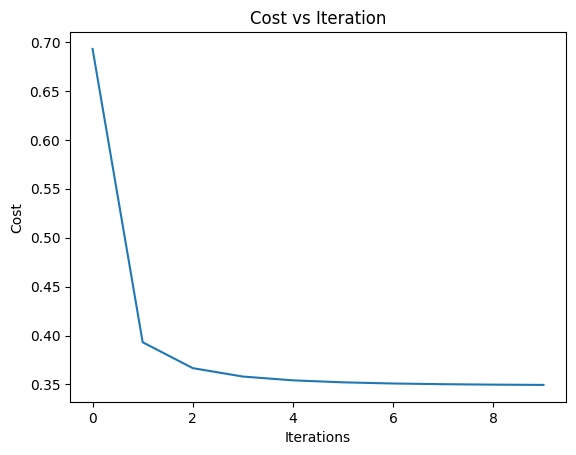

In [ ]:
# cost vs iteration graph
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# 5. Predict function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    y_pred = (y_hat >= 0.5).astype(int)  # threshold at 0.5
    return y_pred

In [ ]:
# Example usage (assuming you already trained and have w, b)
w, b, costs = gradient_descent(X_train, y_train.values.reshape(-1, 1), w, b, learning_rate=0.01, num_iterations=1000)
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

print(f" y_pred_test: {y_pred_test.flatten().tolist()}")

Iteration 0, Cost: 0.3686
Iteration 100, Cost: 0.3686
Iteration 200, Cost: 0.3686
Iteration 300, Cost: 0.3686
Iteration 400, Cost: 0.3686
Iteration 500, Cost: 0.3686
Iteration 600, Cost: 0.3686
Iteration 700, Cost: 0.3686
Iteration 800, Cost: 0.3686
Iteration 900, Cost: 0.3686
 y_pred_test: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [ ]:
from sklearn.metrics import accuracy_score , log_loss
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Loss:", log_loss(y_test, y_pred_test))

Test Accuracy: 0.8875
Test Loss: 4.054911006275679


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and fit model
model = LogisticRegression()
model.fit(X_train, y_train.values)

# Predictions
y_pred_sklearn_test = model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score , log_loss
print("Sklearn Test Accuracy:", accuracy_score(y_test, y_pred_sklearn_test))
print("Sklearn Test Loss:", log_loss(y_test, y_pred_sklearn_test))
print("w = ", model.coef_)
print("b = ", model.intercept_)

Sklearn Test Accuracy: 0.8875
Sklearn Test Loss: 4.054911006275679
w =  [[0.29076187 2.07494369 1.19147586]]
b =  [-1.17985509]
